In [1]:
import numpy as np
import copy
from IPython.display import HTML
from matplotlib import pyplot as plt, colors
import dill

import SimPEG as simpeg
from SimPEG.EM import NSEM

import sys
sys.path.append("../../../../pymatsolver/")
from pymatsolver import PardisoSolver
sys.path.append("../../../../../Dropbox/PhD_UBC/telluricpy/")
import telluricpy


# Set some matplotlib settings
%matplotlib inline

In [2]:
mtData = dill.load(open('sphere_mtData_1e2_1e1.pklb','rb'))

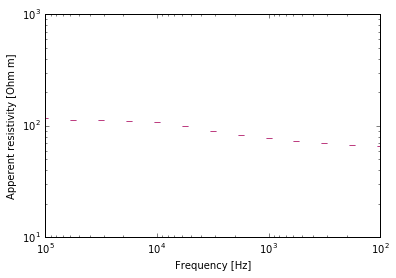

In [3]:
mtData.plot_app_res(np.array([0.,0.]))

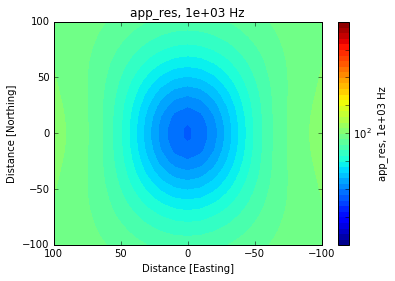

In [4]:
# cont_kwargs={'levels':np.linspace(600,1400,17)}#,'norm':colors.LogNorm()}
cont_kwargs = {'levels':np.logspace(1.8,2.2,41),'norm':colors.LogNorm()}
component = 'app_res'
freq = 1e3
mtData.map_iso_frequency(freq, 'Z', 'xy', component=component,ax=None, plot_error=False, **cont_kwargs)
plt.gca().set_title(('%s, %.g Hz')%(component,freq))
cb = plt.colorbar()
cb.set_label(('%s, %.g Hz')%(component,freq))


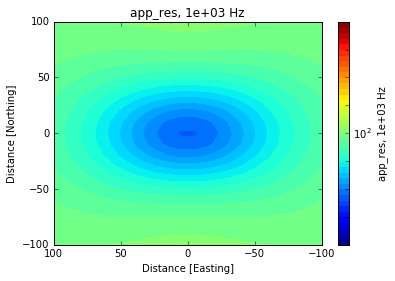

In [5]:
cont_kwargs = {'levels':np.logspace(1.8,2.2,41),'norm':colors.LogNorm()}
component = 'app_res'
freq = 1e3
mtData.map_iso_frequency(freq, 'Z', 'yx', component=component,ax=None, plot_error=False, **cont_kwargs)
plt.gca().set_title(('%s, %.g Hz')%(component,freq))
cb = plt.colorbar()
cb.set_label(('%s, %.g Hz')%(component,freq))

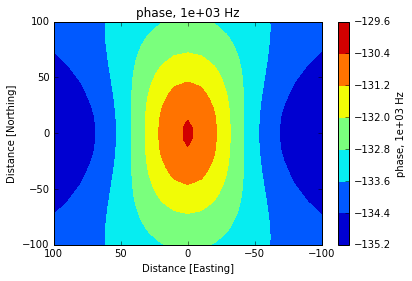

In [6]:
component = 'phase'
freq = 1e3
mtData.map_iso_frequency(freq, 'Z', 'xy', component=component)#, plot_kwargs={'level':np.arange(-180,-90,2)})
plt.gca().set_title(('%s, %.g Hz')%(component,freq))
cb = plt.colorbar()
cb.set_label(('%s, %.g Hz')%(component,freq))

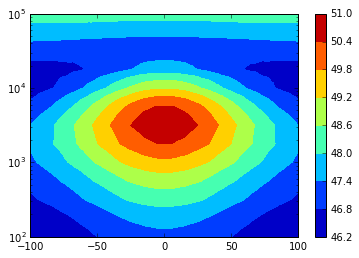

In [7]:
cont_args = {'levels':np.logspace(1.5,2.2,8*4+1)}#,'norm':colors.LogNorm()}
# cont_args = {'levels':np.linspace(50.,150.,11)}#,'norm':colors.LogNorm()}
fig, ax, cont = mtData.section_plot({'y':0.},'Z','yx','phase',ax=None, plot_error=False)#, **cont_args)
ax.set_yscale('log')
plt.colorbar(cont)

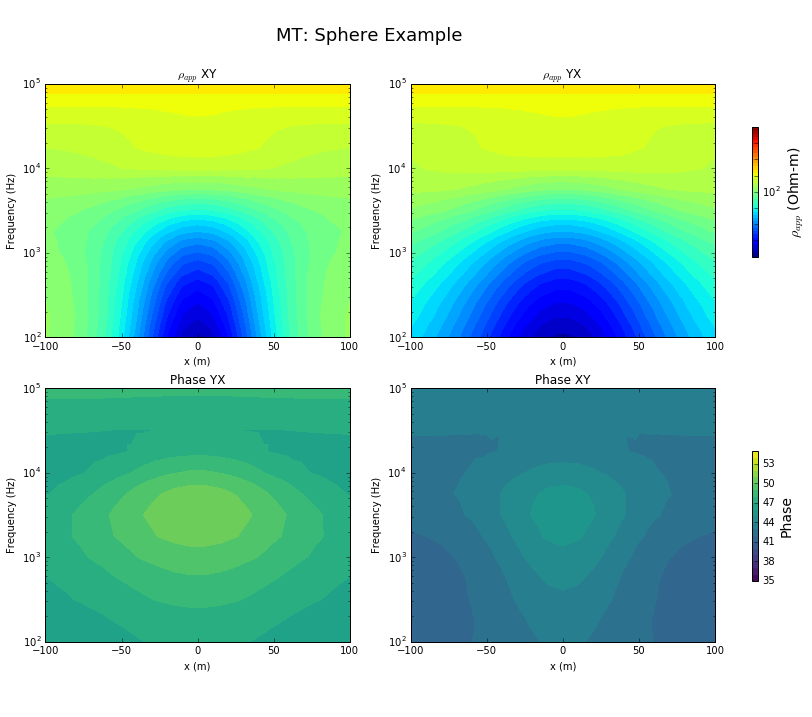

In [8]:
fig = plt.figure(figsize= (12,10))
ax0 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
ax1 = plt.subplot(224)

cont_args_app_res = {'levels':np.logspace(1.8,2.2,41),'norm':colors.LogNorm()}
cont_args_phasexy = {'levels':np.linspace(-145.,-115.,21),'cmap':'viridis'}#,'norm':colors.LogNorm()}
cont_args_phaseyx = {'levels':np.linspace(35.,55.,21),'cmap':'viridis'}#,'norm':colors.LogNorm()}


fig,ax0,cont_appresxy = mtData.section_plot({'y':0.},'Z','xy','app_res',ax=ax0, plot_error=False, **cont_args_app_res)
fig,ax1,cont_phasexy = mtData.section_plot({'y':0.},'Z','xy','phase',ax=ax1, plot_error=False, **cont_args_phasexy)
fig,ax2,cont_appresyx = mtData.section_plot({'y':0.},'Z','yx','app_res',ax=ax2, plot_error=False, **cont_args_app_res)
fig,ax3,cont_phaseyx = mtData.section_plot({'y':0.},'Z','yx','phase',ax=ax3, plot_error=False, **cont_args_phaseyx)
ax0.set_yscale('log')
ax1.set_yscale('log')
ax2.set_yscale('log')
ax3.set_yscale('log')

ax0.set_xlabel('x (m)')
ax0.set_ylabel('Frequency (Hz)')
ax1.set_xlabel('x (m)')
ax1.set_ylabel('Frequency (Hz)')
ax2.set_xlabel('x (m)')
ax2.set_ylabel('Frequency (Hz)')
ax3.set_xlabel('x (m)')
ax3.set_ylabel('Frequency (Hz)')

ax0.set_title(r'$\rho_{app}$ XY')
ax2.set_title(r'$\rho_{app}$ YX')
ax1.set_title(r'Phase XY')
ax3.set_title(r'Phase YX')

cbar_ax = fig.add_axes([0.9, 0.5, 0.05, 0.5])
cbar_ax.axis('off')
cb = plt.colorbar(cont_appresxy, ax=cbar_ax)#,format = formatter)
cb.set_label(r'$\rho_{app}$ (Ohm-m)',fontsize = 14.)

cbar_ax = fig.add_axes([0.9, 0.05, 0.05, 0.5])
cbar_ax.axis('off')
cb = plt.colorbar(cont_phaseyx, ax=cbar_ax)#,format = formatter)
cb.set_label(r'Phase',fontsize = 14.)
fig.suptitle('MT: Sphere Example',fontsize =18.)

#plt.tight_layout()

In [29]:
10**(np.array([1.9,2,2.1]))

array([  79.43282347,  100.        ,  125.89254118])

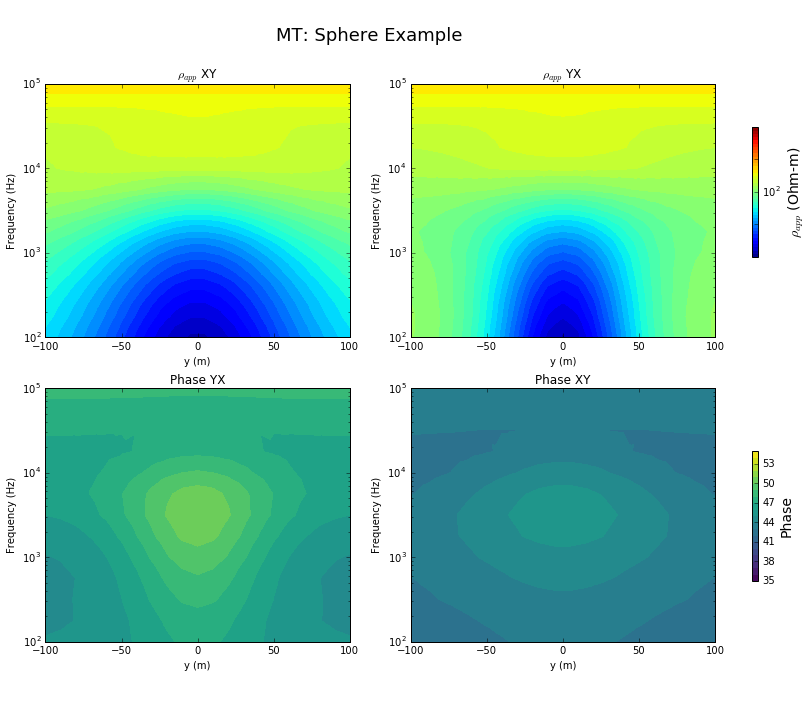

In [30]:
fig = plt.figure(figsize= (12,10))
ax0 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
ax1 = plt.subplot(224)

cont_args_app_res = {'levels':np.logspace(1.8,2.2,41),'norm':colors.LogNorm()}
cont_args_phasexy = {'levels':np.linspace(-145.,-115.,21),'cmap':'viridis'}#,'norm':colors.LogNorm()}
cont_args_phaseyx = {'levels':np.linspace(35.,55.,21),'cmap':'viridis'}#,'norm':colors.LogNorm()}


fig,ax0,cont_appresxy = mtData.section_plot({'x':0.},'Z','xy','app_res',ax=ax0, plot_error=False, **cont_args_app_res)
fig,ax1,cont_phasexy = mtData.section_plot({'x':0.},'Z','xy','phase',ax=ax1, plot_error=False, **cont_args_phasexy)
fig,ax2,cont_appresyx = mtData.section_plot({'x':0.},'Z','yx','app_res',ax=ax2, plot_error=False, **cont_args_app_res)
fig,ax3,cont_phaseyx = mtData.section_plot({'x':0.},'Z','yx','phase',ax=ax3, plot_error=False, **cont_args_phaseyx)
ax0.set_yscale('log')
ax1.set_yscale('log')
ax2.set_yscale('log')
ax3.set_yscale('log')

ax0.set_xlabel('y (m)')
ax0.set_ylabel('Frequency (Hz)')
ax1.set_xlabel('y (m)')
ax1.set_ylabel('Frequency (Hz)')
ax2.set_xlabel('y (m)')
ax2.set_ylabel('Frequency (Hz)')
ax3.set_xlabel('y (m)')
ax3.set_ylabel('Frequency (Hz)')

ax0.set_title(r'$\rho_{app}$ XY')
ax2.set_title(r'$\rho_{app}$ YX')
ax1.set_title(r'Phase XY')
ax3.set_title(r'Phase YX')

cbar_ax = fig.add_axes([0.9, 0.5, 0.05, 0.5])
cbar_ax.axis('off')
cb = plt.colorbar(cont_appresxy, ax=cbar_ax, ticks=10**(np.array([1.9,2,2.1])))#,format = formatter)
cb.set_label(r'$\rho_{app}$ (Ohm-m)',fontsize = 14.)

cbar_ax = fig.add_axes([0.9, 0.05, 0.05, 0.5])
cbar_ax.axis('off')
cb = plt.colorbar(cont_phaseyx, ax=cbar_ax)#,format = formatter)
cb.set_label(r'Phase',fontsize = 14.)
fig.suptitle('MT: Sphere Example',fontsize =18.)

#plt.tight_layout()

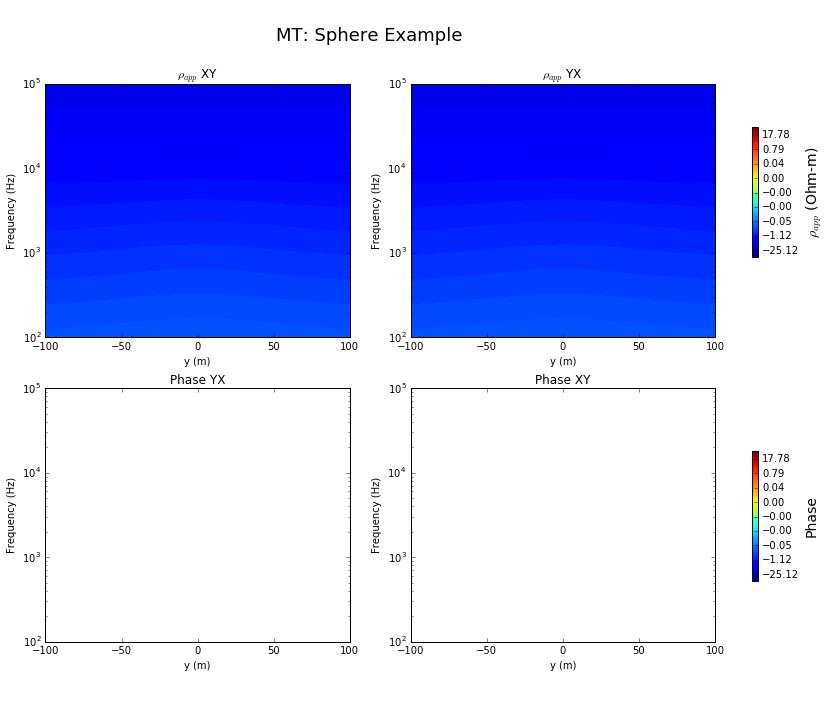

In [24]:
fig = plt.figure(figsize= (12,10))
ax0 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
ax1 = plt.subplot(224)

sym_scale = np.concatenate((-np.logspace(2,-4,41),np.logspace(-4,2,41)))
cont_args_app_res = {'levels':sym_scale,'norm':colors.SymLogNorm(1e-4)}
cont_args_phasexy = {'levels':np.linspace(-145.,-115.,21),'cmap':'viridis'}#,'norm':colors.LogNorm()}
cont_args_phaseyx = {'levels':np.linspace(35.,55.,21),'cmap':'viridis'}#,'norm':colors.LogNorm()}


fig,ax0,cont_appresxy = mtData.section_plot({'x':0.},'Z','xy','real',ax=ax0, plot_error=False, **cont_args_app_res)
fig,ax1,cont_phasexy = mtData.section_plot({'x':0.},'Z','xy','imag',ax=ax1, plot_error=False, **cont_args_phasexy)
fig,ax2,cont_appresyx = mtData.section_plot({'x':0.},'Z','xy','real',ax=ax2, plot_error=False, **cont_args_app_res)
fig,ax3,cont_phaseyx = mtData.section_plot({'x':0.},'Z','xy','imag',ax=ax3, plot_error=False, **cont_args_phaseyx)
ax0.set_yscale('log')
ax1.set_yscale('log')
ax2.set_yscale('log')
ax3.set_yscale('log')

ax0.set_xlabel('y (m)')
ax0.set_ylabel('Frequency (Hz)')
ax1.set_xlabel('y (m)')
ax1.set_ylabel('Frequency (Hz)')
ax2.set_xlabel('y (m)')
ax2.set_ylabel('Frequency (Hz)')
ax3.set_xlabel('y (m)')
ax3.set_ylabel('Frequency (Hz)')

ax0.set_title(r'$\rho_{app}$ XY')
ax2.set_title(r'$\rho_{app}$ YX')
ax1.set_title(r'Phase XY')
ax3.set_title(r'Phase YX')

cbar_ax = fig.add_axes([0.9, 0.5, 0.05, 0.5])
cbar_ax.axis('off')
cb = plt.colorbar(cont_appresxy, ax=cbar_ax)#,format = formatter)
cb.set_label(r'$\rho_{app}$ (Ohm-m)',fontsize = 14.)

cbar_ax = fig.add_axes([0.9, 0.05, 0.05, 0.5])
cbar_ax.axis('off')
cb = plt.colorbar(cont_appresxy, ax=cbar_ax)#,format = formatter)
cb.set_label(r'Phase',fontsize = 14.)
fig.suptitle('MT: Sphere Example',fontsize =18.)



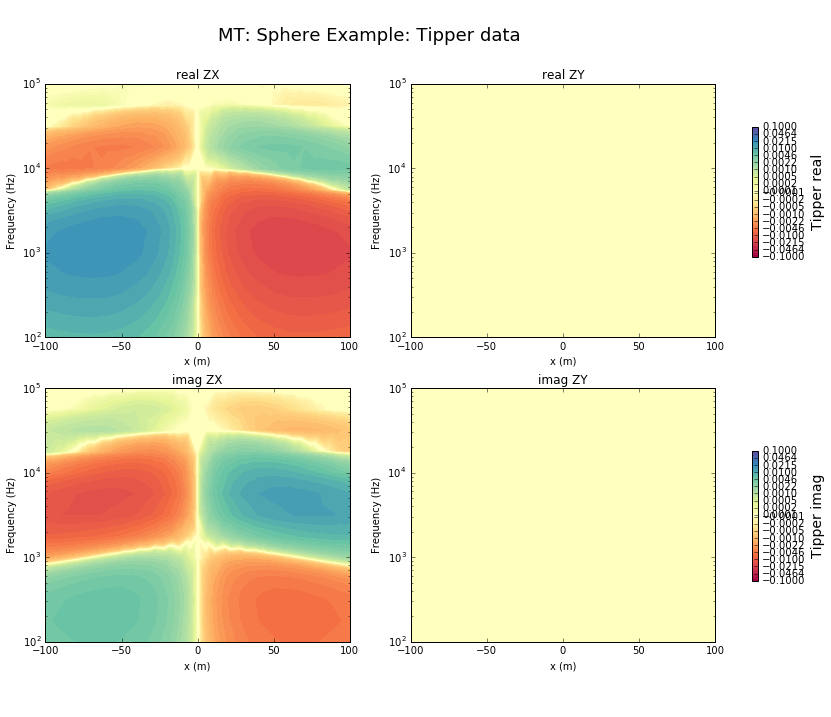

In [10]:
fig = plt.figure(figsize= (12,10))
ax0 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
ax1 = plt.subplot(224)

cont_args_app_res = {'levels':np.linspace(50.,150.,11)}#,'norm':colors.LogNorm()}
cont_args_phasexy = {'levels':np.linspace(-145.,-115.,21),'cmap':'viridis'}#,'norm':colors.LogNorm()}
cont_args_phaseyx = {'levels':np.linspace(35.,55.,21),'cmap':'viridis'}#,'norm':colors.LogNorm()}
log_levels = np.logspace(-4,-1,31)
sym_log_levels = np.concatenate((-log_levels[::-1],log_levels))
cont_args_tip = {'levels':sym_log_levels,'cmap':'Spectral','norm':colors.SymLogNorm(1e-4,linscale=.1)}

fig,ax0,cont_appresxy = mtData.section_plot({'y':0.},'T','zx','real',ax=ax0, plot_error=False, **cont_args_tip)
fig,ax1,cont_phasexy = mtData.section_plot({'y':0.},'T','zy','imag',ax=ax1, plot_error=False, **cont_args_tip)
fig,ax2,cont_appresyx = mtData.section_plot({'y':0.},'T','zy','real',ax=ax2, plot_error=False, **cont_args_tip)
fig,ax3,cont_phaseyx = mtData.section_plot({'y':0.},'T','zx','imag',ax=ax3, plot_error=False, **cont_args_tip)
ax0.set_yscale('log')
ax1.set_yscale('log')
ax2.set_yscale('log')
ax3.set_yscale('log')

ax0.set_xlabel('x (m)')
ax0.set_ylabel('Frequency (Hz)')
ax1.set_xlabel('x (m)')
ax1.set_ylabel('Frequency (Hz)')
ax2.set_xlabel('x (m)')
ax2.set_ylabel('Frequency (Hz)')
ax3.set_xlabel('x (m)')
ax3.set_ylabel('Frequency (Hz)')

ax0.set_title(r'real ZX')
ax1.set_title(r'imag ZY')
ax2.set_title(r'real ZY')
ax3.set_title(r'imag ZX')

cbar_levels = np.logspace(-4,-1,10)
cbar_lev = np.concatenate((-cbar_levels[::-1],cbar_levels))

cbar_ax = fig.add_axes([0.9, 0.5, 0.05, 0.5])
cbar_ax.axis('off')
cb = plt.colorbar(cont_appresxy, ax=cbar_ax, ticks=cbar_lev)#,format = formatter)
cb.set_label(r'Tipper real',fontsize = 14.)

cbar_ax = fig.add_axes([0.9, 0.05, 0.05, 0.5])
cbar_ax.axis('off')
cb = plt.colorbar(cont_phaseyx, ax=cbar_ax, ticks=cbar_lev)  #format = formatter)
cb.set_label(r'Tipper imag',fontsize = 14.)
fig.suptitle('MT: Sphere Example: Tipper data',fontsize =18.)

#plt.tight_layout()

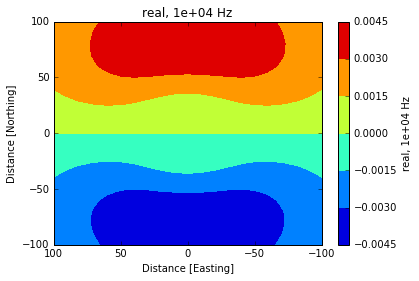

In [11]:
component = 'real'
freq = 1e4
mtData.map_iso_frequency(freq, 'T', 'zy', component=component)#, plot_kwargs={'level':np.arange(-180,-90,2)})
plt.gca().set_title(('%s, %.g Hz')%(component,freq))
cb = plt.colorbar()
cb.set_label(('%s, %.g Hz')%(component,freq))

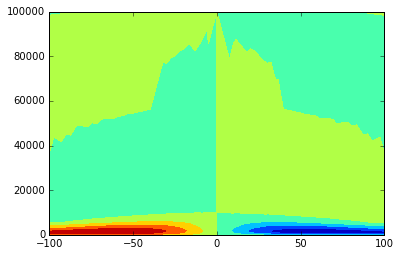

In [12]:
fig,ax0,cont_appresxy = mtData.section_plot({'y':0.},'T','zx','real',ax=None, plot_error=False)#, **cont_args_app_res)


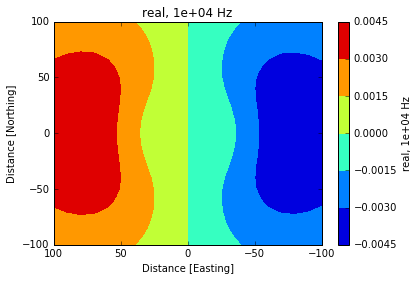

In [13]:
component = 'real'
freq = 1e4
mtData.map_iso_frequency(freq, 'T', 'zx', component=component)#, plot_kwargs={'level':np.arange(-180,-90,2)})
plt.gca().set_title(('%s, %.g Hz')%(component,freq))
cb = plt.colorbar()
cb.set_label(('%s, %.g Hz')%(component,freq))

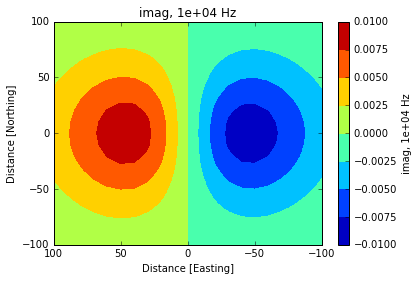

In [14]:
component = 'imag'
freq = 1e4
mtData.map_iso_frequency(freq, 'T', 'zx', component=component)#, plot_kwargs={'level':np.arange(-180,-90,2)})
plt.gca().set_title(('%s, %.g Hz')%(component,freq))
cb = plt.colorbar()
cb.set_label(('%s, %.g Hz')%(component,freq))

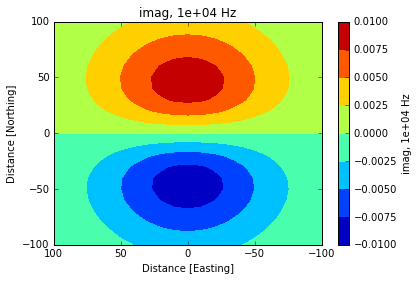

In [15]:
component = 'imag'
freq = 1e4
mtData.map_iso_frequency(freq, 'T', 'zy', component=component)#, plot_kwargs={'level':np.arange(-180,-90,2)})
plt.gca().set_title(('%s, %.g Hz')%(component,freq))
cb = plt.colorbar()
cb.set_label(('%s, %.g Hz')%(component,freq))

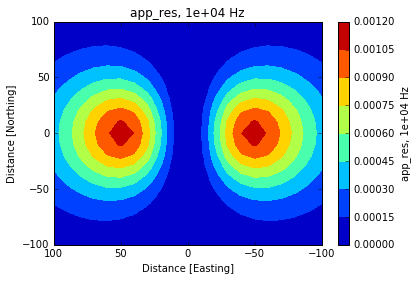

In [16]:
component = 'app_res'
freq = 1e4
mtData.map_iso_frequency(freq, 'T', 'zx', component=component)#, plot_kwargs={'level':np.arange(-180,-90,2)})
plt.gca().set_title(('%s, %.g Hz')%(component,freq))
cb = plt.colorbar()
cb.set_label(('%s, %.g Hz')%(component,freq))

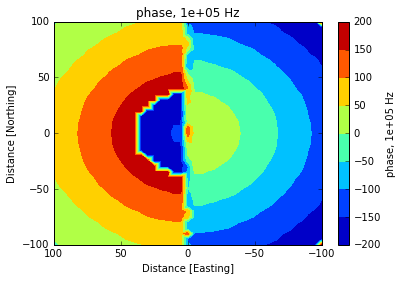

In [17]:
component = 'phase'
freq = 1e5
mtData.map_iso_frequency(freq, 'T', 'zx', component=component)#, plot_kwargs={'level':np.arange(-180,-90,2)})
plt.gca().set_title(('%s, %.g Hz')%(component,freq))
cb = plt.colorbar()
cb.set_label(('%s, %.g Hz')%(component,freq))

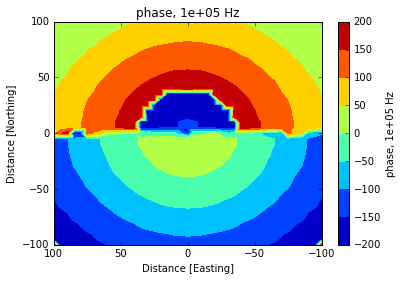

In [18]:
component = 'phase'
freq = 1e5
mtData.map_iso_frequency(freq, 'T', 'zy', component=component)#, plot_kwargs={'level':np.arange(-180,-90,2)})
plt.gca().set_title(('%s, %.g Hz')%(component,freq))
cb = plt.colorbar()
cb.set_label(('%s, %.g Hz')%(component,freq))